Predicting Home Prices

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read in training and test data
features_train = pd.read_csv('X_train.csv', index_col = 0)
features_test = pd.read_csv('X_test.csv', index_col = 0)
labels_train = pd.read_csv('y_train.csv', index_col = 0).squeeze()
labels_test = pd.read_csv('y_test.csv', index_col = 0).squeeze()

In [5]:
features_train.head()

,size_bath_interaction,city_Acton,city_Adelanto,city_Adin,city_Agoura,city_Agoura Hills,city_Agua Dulce,city_Aguanga,city_Ahwahnee,city_Alameda,...,city_Yorba Linda,city_Yorkville,city_Yosemite West,city_Yountville,city_Yreka,city_Yuba City,city_Yucaipa,city_Yucca Valley,city_Zamora,city_Zenia
68244,3364.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27671,8907.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11895,6699.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60535,3400.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36982,2648.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def lasso(lam, features_train, features_test, labels_train, labels_test):
  model = Lasso(alpha=lam)
  model.fit(features_train, labels_train)
  # print(f'Model Coefficients: {model.coef_}')
  train_predictions = model.predict(features_train)
  test_predictions = model.predict(features_test)

  # Non-zero coefficients
  print(len(list(filter(lambda x: x == 0, model.coef_))))

  # Accuracy
  r2 = r2_score(labels_test, test_predictions)
  print(f'R squared- lambda = {lam}: {r2:.2f}')

  mean_error = mean_absolute_error(labels_test, test_predictions)
  print(f'Mean Absolute Error- lambda = {lam}: {mean_error:.2f}')

  rmse = sqrt(mean_squared_error(labels_test, test_predictions))
  print(f'Root Mean Squared Error- lambda = {lam}: {rmse:.2f}')

In [7]:
def lasso(lam, features_train, features_test, labels_train, labels_test, r2s):
  model = Lasso(alpha=lam)
  model.fit(features_train, labels_train)
  # print(f'Model Coefficients: {model.coef_}')
  train_predictions = model.predict(features_train)
  test_predictions = model.predict(features_test)

  # Non-zero coefficients
  print(len(list(filter(lambda x: x == 0, model.coef_))))

  # Accuracy
  r2 = r2_score(labels_test, test_predictions)
  print(f'R squared- lambda = {lam}: {r2:.2f}')
  r2s.append(r2)

  mean_error = mean_absolute_error(labels_test, test_predictions)
  print(f'Mean Absolute Error- lambda = {lam}: {mean_error:.2f}')

  rmse = sqrt(mean_squared_error(labels_test, test_predictions))
  print(f'Root Mean Squared Error- lambda = {lam}: {rmse:.2f}')

  return r2s

In [8]:
# Calculate LASSO for each lambda
r2s = []
lambdas = [0.1, 0.4, 0.5, 1, 1.5, 2, 2.5]
for lam in lambdas:
  r2s = lasso(lam, features_train, features_test, labels_train, labels_test, r2s)

print(r2s)

72
R squared- lambda = 0.1: 0.60
Mean Absolute Error- lambda = 0.1: 187449.85
Root Mean Squared Error- lambda = 0.1: 274650.39
81
R squared- lambda = 0.4: 0.60
Mean Absolute Error- lambda = 0.4: 187410.80
Root Mean Squared Error- lambda = 0.4: 274587.01
84
R squared- lambda = 0.5: 0.60
Mean Absolute Error- lambda = 0.5: 187405.33
Root Mean Squared Error- lambda = 0.5: 274570.80
93
R squared- lambda = 1: 0.61
Mean Absolute Error- lambda = 1: 187383.22
Root Mean Squared Error- lambda = 1: 274495.56
108
R squared- lambda = 1.5: 0.61
Mean Absolute Error- lambda = 1.5: 187368.94
Root Mean Squared Error- lambda = 1.5: 274424.80
119
R squared- lambda = 2: 0.61
Mean Absolute Error- lambda = 2: 187364.68
Root Mean Squared Error- lambda = 2: 274363.41
127
R squared- lambda = 2.5: 0.61
Mean Absolute Error- lambda = 2.5: 187366.67
Root Mean Squared Error- lambda = 2.5: 274311.62
[0.6047698328139872, 0.6049522307595171, 0.6049988718116106, 0.6052153417940305, 0.6054188502587778, 0.6055953597664139,

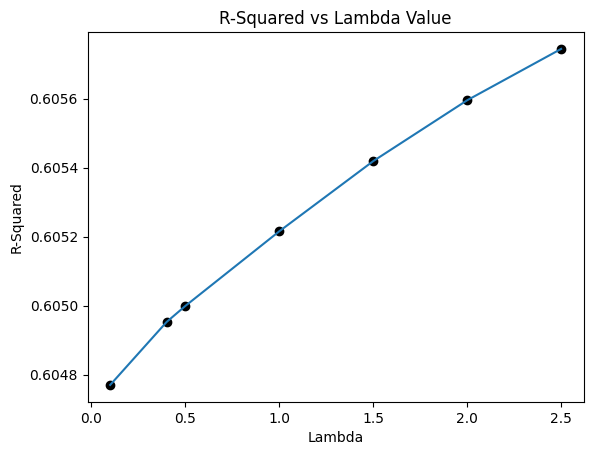

In [9]:
import matplotlib.pyplot as plt
plt.scatter(lambdas, r2s, label='Data', c='black')
plt.plot(lambdas, r2s)
plt.xlabel('Lambda')
plt.ylabel('R-Squared')
plt.title('R-Squared vs Lambda Value')
plt.show()